In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Bootstrapping (Nonparametric Inference)

- *random sampling with replacement*
- resampling technique to simulate drawing new samples (where repeating experiments is not feasible or possible)
- typically, the new sample has size *n*, where *n* is the size of the original dataset

## Sample mean, standard error of the mean,  and estimating the population mean

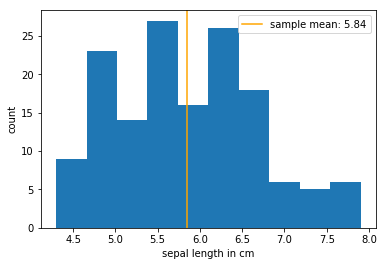

In [2]:
df = pd.read_csv('../datasets/iris/iris.csv')

x = df['sepal_length'].values
x_mean = np.mean(x)
plt.hist(x, bins=10)
plt.axvline(x_mean, color='orange', label='sample mean: %.2f' % x_mean)
plt.xlabel('sepal length in cm')
plt.ylabel('count')
plt.legend(loc=1)
plt.show()

#### Standard Error (SE)

$$SE_{\bar{x}} = \frac{s}{\sqrt{n}}$$

- the standard error *SE* (or *standard error of the mean*) estimates the standard deviation (*s*) of the sample mean ($\bar{x}$)
- i.e., the *SE* measures the variability when taking different samples from the population
- in other words, the *SE* measures the variability between samples, whereas the sample standard deviation measures the variability within a sample
- we use the standard error to judge how "good" our estimate of the population mean ($\mu$) is

In [3]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162276


In [4]:
scipy.stats.sem(x)

0.067611316227598597

#### Bootstrapping and estimating the population mean

In [5]:
def bootstrap_means(x, n_bootstrap_samples, seed=None):

    rng = np.random.RandomState(seed)
    sample_means = np.zeros(shape=n_bootstrap_samples)
    
    for i in range(n_bootstrap_samples):
        boot_sample = rng.choice(x, size=x.shape[0], replace=True)
        # replicate is a general term for a statistic computed
        # from a bootstrap sample
        bootstrap_replicate = np.mean(boot_sample)
        sample_means[i] = bootstrap_replicate
    return sample_means

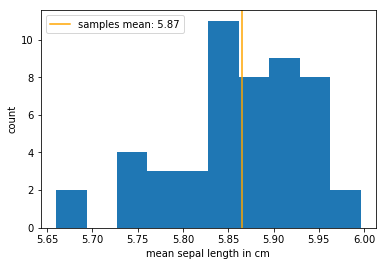

In [6]:
boot_50 = bootstrap_means(x, n_bootstrap_samples=50, seed=123)

boot_mean = np.mean(boot_50)
plt.hist(boot_50, bins=10)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

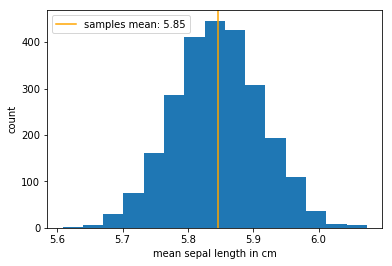

In [7]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

boot_mean = np.mean(boot_2500)
plt.hist(boot_2500, bins=15)
plt.axvline(boot_mean, color='orange', label='samples mean: %.2f' % boot_mean)
plt.xlabel('mean sepal length in cm')
plt.ylabel('count')
plt.legend(loc=2)
plt.show()

- note: no matter how the sample is distributed, the sample mean follows a normal distribution

In [8]:
np.std(boot_2500, ddof=1)

0.066664363123601356

- remember, the standard deviation of the bootstrap replicates (means) estimates the standard error of the mean (which estimates the standard deviation of the population mean)

In [9]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
print('standard error', se)

standard error 0.0676113162276


In [10]:
def empirical_cdf(sample):
    x = np.sort(sample)
    y = np.arange(1, x.shape[0] + 1) / x.shape[0]
    return x, y

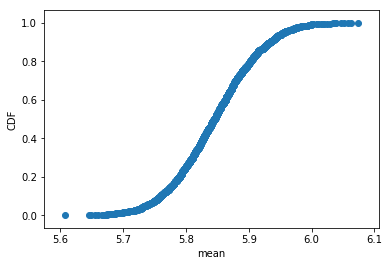

In [11]:
ecdf_x, ecdf_y = empirical_cdf(boot_2500)
plt.scatter(ecdf_x, ecdf_y)
plt.xlabel('mean')
plt.ylabel('CDF')

## Confidence Intervals

- 95% confidence interval: 95% of the sample means (if we would draw new samples / repeat the experiments) would fall within the confidence interval

####  From bootstrap replicates:

In [12]:
boot_2500 = bootstrap_means(x, n_bootstrap_samples=2500, seed=123)

lower, upper = np.percentile(boot_2500, [2.5, 97.5])

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.72, 5.98]


#### From the original data (i.e., from a single sample):

In [13]:
def confidence_interval(x, ci=0.95):
    x_mean = np.mean(x)
    se = np.std(x, ddof=1) / np.sqrt(x.shape[0])
    h = se * scipy.stats.t._ppf((1 + ci)/2. , x.shape[0])
    return x_mean - h, x_mean + h

lower, upper = confidence_interval(x, ci=0.95)


print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]


In [14]:
se = np.std(x, ddof=1) / np.sqrt(x.shape[0])

lower, upper = scipy.stats.norm.interval(alpha=0.95, 
                                         loc=np.mean(x), 
                                         scale=se)

print('95%% confidence interval: [%.2f, %.2f]' % (lower, upper))

95% confidence interval: [5.71, 5.98]
